# Commuunicate Data Findings on Prosper Loan Dataset
## by Rasagnya 

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

In [5]:
print(data.shape)


(113937, 81)


> The dataset contains 113,937 rows and 81 columns

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is/are the main feature(s) of interest in your dataset?

> Main features I'd like to consider are Income, Occupation, EmploymentStatus, ProsperRating, MonthlyLoanPayments, BOrrowerAPR to decide if an applicant should be granted a loan or not

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


In [9]:
cols = ['Term','LoanStatus','BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner','PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'AvailableBankcardCredit', 'TotalTrades',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate',
       'MonthlyLoanPayment']
df = data[cols]
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,0,CO,...,3083.333333,NaN,NaN,NaN,NaN,NaN,19141,9425,2007-09-12 00:00:00,330.43
1,36,Current,0.12016,0.0920,0.0820,6.0,A,7.0,2,CO,...,6125.000000,NaN,NaN,NaN,NaN,NaN,134815,10000,2014-03-03 00:00:00,318.93
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,0,GA,...,2083.333333,NaN,NaN,NaN,NaN,NaN,6466,3001,2007-01-17 00:00:00,123.32
3,36,Current,0.12528,0.0974,0.0874,6.0,A,9.0,16,GA,...,2875.000000,NaN,NaN,NaN,NaN,NaN,77296,10000,2012-11-01 00:00:00,321.45
4,36,Current,0.24614,0.2085,0.1985,3.0,D,4.0,2,MN,...,9583.333333,1.0,11.0,11.0,11000.0,9947.9,102670,15000,2013-09-20 00:00:00,563.97


> The above mentioned columns are the features of interest that help me in supporting my investigation

In [10]:
df.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,PublicRecordsLast10Years,PublicRecordsLast12Months,...,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,113937.000000,106312.000000,113240.000000,106333.000000,...,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,113937.000000,113937.00000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,4.072243,5.950067,2.774209,96.071582,0.312646,0.015094,...,0.275947,5.608026e+03,1.421100,22.934345,22.271949,8472.311961,2930.313906,69444.474271,8337.01385,272.475783
std,10.436212,0.080364,0.074818,0.074516,1.673227,2.376501,3.996797,94.480605,0.727868,0.154092,...,0.551759,7.478497e+03,0.764042,19.249584,18.830425,7395.507650,3806.635075,38930.479610,6245.80058,192.697812
min,12.000000,0.006530,0.000000,-0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000
25%,36.000000,0.156290,0.134000,0.124200,3.000000,4.000000,1.000000,26.000000,0.000000,0.000000,...,0.140000,3.200333e+03,1.000000,9.000000,9.000000,3500.000000,0.000000,37332.000000,4000.00000,131.620000
50%,36.000000,0.209760,0.184000,0.173000,4.000000,6.000000,1.000000,67.000000,0.000000,0.000000,...,0.220000,4.666667e+03,1.000000,16.000000,15.000000,6000.000000,1626.550000,68599.000000,6500.00000,217.740000
75%,36.000000,0.283810,0.250000,0.240000,5.000000,8.000000,3.000000,137.000000,0.000000,0.000000,...,0.320000,6.825000e+03,2.000000,33.000000,32.000000,11000.000000,4126.720000,101901.000000,12000.00000,371.580000
max,60.000000,0.512290,0.497500,0.492500,7.000000,11.000000,20.000000,755.000000,38.000000,20.000000,...,10.010000,1.750003e+06,8.000000,141.000000,141.000000,72499.000000,23450.950000,136486.000000,35000.00000,2251.510000


In [11]:
df.dtypes

Term                             int64
LoanStatus                      object
BorrowerAPR                    float64
BorrowerRate                   float64
LenderYield                    float64
ProsperRating (numeric)        float64
ProsperRating (Alpha)           object
ProsperScore                   float64
ListingCategory (numeric)        int64
BorrowerState                   object
Occupation                      object
EmploymentStatus                object
EmploymentStatusDuration       float64
IsBorrowerHomeowner               bool
PublicRecordsLast10Years       float64
PublicRecordsLast12Months      float64
AvailableBankcardCredit        float64
TotalTrades                    float64
DebtToIncomeRatio              float64
IncomeRange                     object
IncomeVerifiable                  bool
StatedMonthlyIncome            float64
TotalProsperLoans              float64
TotalProsperPaymentsBilled     float64
OnTimeProsperPayments          float64
ProsperPrincipalBorrowed 

In [12]:
df.duplicated().sum()

0

### Univariate Analysis

### What are the different loan categories?

Text(0.5, 1.0, 'Loan Status counts')

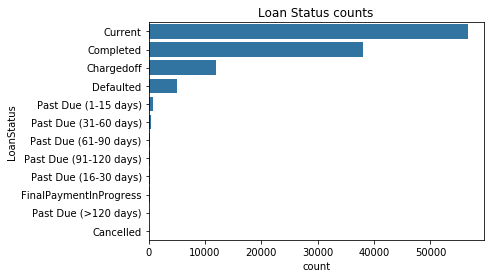

In [13]:
base_color = sb.color_palette()[0]
Loan_order = df['LoanStatus'].value_counts().index
sb.countplot(data = data, y = 'LoanStatus', color = base_color, order = Loan_order);
plt.title('Loan Status counts')

> LoanStatus majorly belongs to the categories Current,Completed,Chargedoff,Defaulted

### What distribution does monthly payment, loan original amount and Borrower APR follow?

C:\Users\avala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\avala\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of BorrowerAPR')

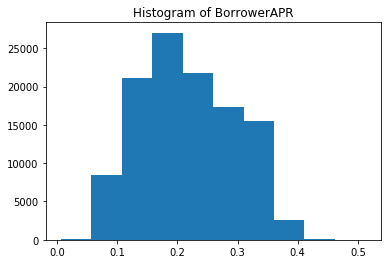

In [14]:
plt.hist(data = df, x = 'BorrowerAPR');
plt.title('Histogram of BorrowerAPR')

> BorrowerAPR tends to have slightly normal distribution although not entirely.

Text(0.5, 1.0, 'Distribution of Monthly Loan Payment')

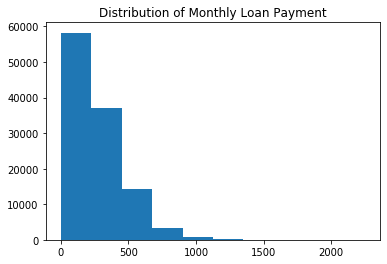

In [15]:
plt.hist(data = df, x = 'MonthlyLoanPayment');
plt.title('Distribution of Monthly Loan Payment')

> Monthly loan payment varies from 0 to 2000, with a right tailed distribution. 


Text(0.5, 1.0, 'Distribution of Original Loan Amount')

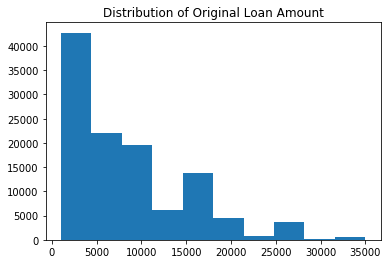

In [16]:
plt.hist(data = df, x = 'LoanOriginalAmount');
plt.title('Distribution of Original Loan Amount')

> Original Loan Amount also has a slight uneven distribution.

### What are the top 10 occupations of loan applicants?

Text(0.5, 1.0, 'Top 10 occupations of loan applicants')

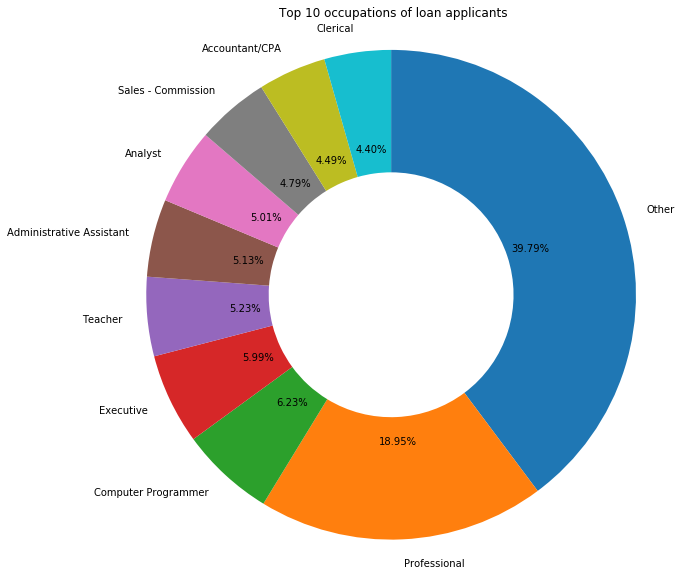

In [17]:
sorted_counts = df['Occupation'].value_counts().nlargest(10) 

plt.figure(figsize = [20, 10])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5}, autopct = '%.2f%%');
plt.axis('square')
plt.title("Top 10 occupations of loan applicants")


In [18]:
df1 = df[df['Occupation']!='Other']

Text(0.5, 1.0, 'Top 10 occupations of loan applicants')

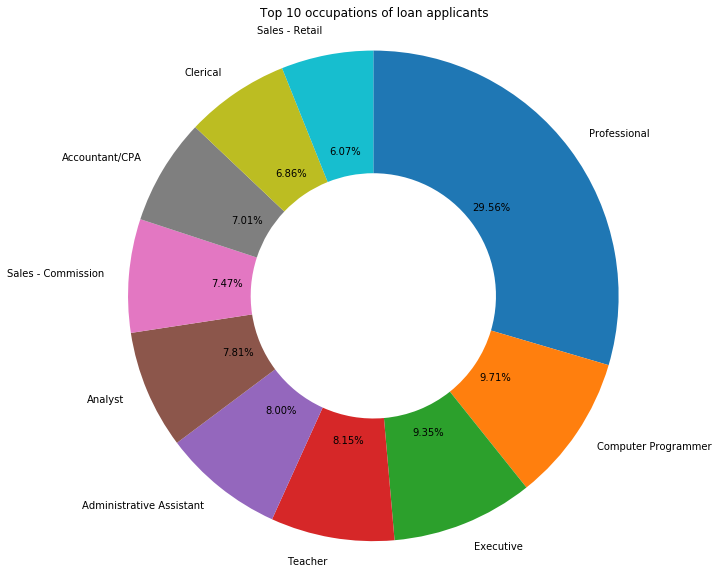

In [19]:
sorted_counts = df1['Occupation'].value_counts().nlargest(10) 

plt.figure(figsize = [20, 10])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5}, autopct = '%.2f%%');
plt.axis('square')
plt.title("Top 10 occupations of loan applicants")

> The occupations of loan applicants is topped by professional followed by computer programmer, executive etc

### What kind of loan terms available?

Text(0.5, 1.0, 'Loan Status counts')

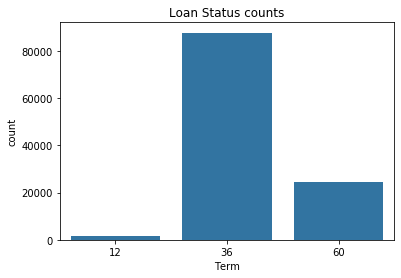

In [20]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term' ,  color = base_color);
plt.title('Loan Status counts')

> Term is divided in to 3 categories - 12 month, 36 months and 60 months

### Does owning a house play any factor in a loan application?

In [18]:
df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [19]:
df2 = df[df['IsBorrowerHomeowner']==False]
df2['StatedMonthlyIncome'].value_counts()

4166.666667     1918
3333.333333     1792
2500.000000     1625
5000.000000     1591
3750.000000     1436
2916.666667     1277
4583.333333     1138
5416.666667     1044
5833.333333      971
2083.333333      955
6250.000000      933
0.000000         920
3500.000000      862
6666.666667      832
3000.000000      804
4333.333333      792
2666.666667      749
4000.000000      690
1666.666667      620
2000.000000      608
8333.333333      585
3166.666667      569
7083.333333      526
2333.333333      519
7500.000000      508
10000.000000     428
2166.666667      425
4500.000000      417
2750.000000      409
3583.333333      404
                ... 
3478.500000        1
6438.000000        1
2956.000000        1
4534.250000        1
3633.166667        1
4242.083333        1
1634.916667        1
2022.916667        1
3647.333333        1
3896.833333        1
3483.750000        1
5251.166667        1
2871.416667        1
4407.750000        1
4016.000000        1
5440.000000        1
7820.666667  

> Even though the loan applicants do not have their own home they're still being granted loans probably because of their monthly income and that they have a source of income to repay the loan


### Bivariate Analysis
### What's the relationship between DebtToIncomeRatio and MonthlyLoanPayment?

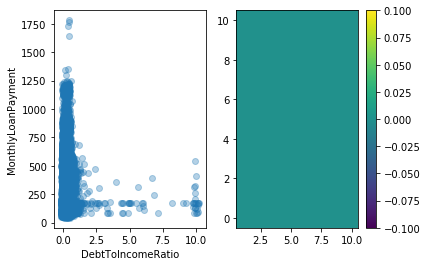

In [23]:
CurrentLoans = df[df['LoanStatus']=='Current']
plt.subplot(1, 2, 1)
sb.regplot(data = CurrentLoans, x = 'DebtToIncomeRatio', y = 'MonthlyLoanPayment', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = CurrentLoans, x = 'DebtToIncomeRatio', y = 'MonthlyLoanPayment',
           bins = [bins_x, bins_y])
plt.colorbar();

> All the analysis has been done on only curret loans as thats the category with most loans in it.

> Debt to income ratio with monthly payment tells us that it's higher when the payment is less. It's better to pay in lesser installments and do it over a large period of time than to pay huge amounts and miss a few payments


### How is Prosper Rating and Employment Status affected by term?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

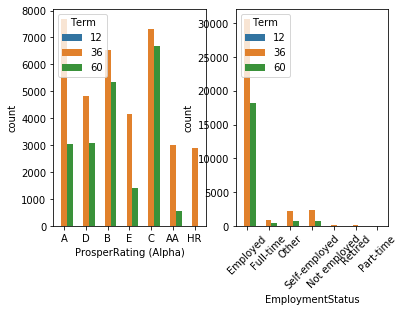

In [25]:
sb.countplot(data = CurrentLoans, x = 'ProsperRating (Alpha)', hue = 'Term')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

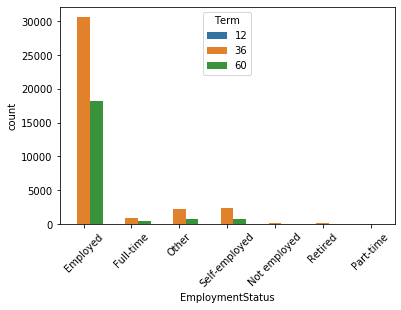

In [23]:
sb.countplot(data = CurrentLoans, x = 'EmploymentStatus', hue = 'Term')
plt.xticks(rotation = 45)

> Most of the loans have been taken for a 36 month term followed by 60 month term when looked across all the employment statuses and ProsperRating, with a zero to no little loans on 12 month term, which is expected because it's too soon to repay.

### How is Monthly payment affected by term?


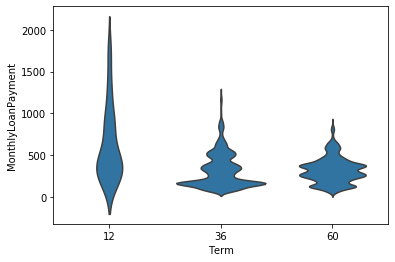

In [26]:
base_color = sb.color_palette()[0]
sb.violinplot(data = CurrentLoans, y = 'MonthlyLoanPayment', x = 'Term', color = base_color,
              inner = None);


> Monthly payment also seems to have the same effect of Prosper Rating and Employment Status with respect to term, with a flat curve for 12 months and a more wider one for the rest

### Multivariate Analysis
### How are some of the features correlated?

<Figure size 720x720 with 0 Axes>

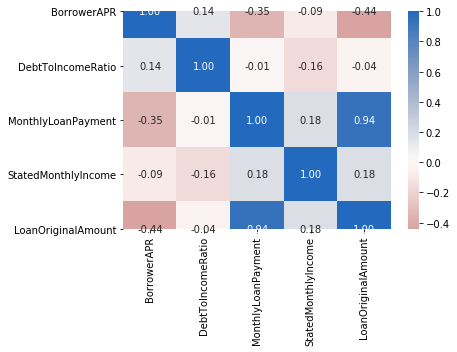

<Figure size 720x720 with 0 Axes>

In [31]:
cols = ['BorrowerAPR', 'DebtToIncomeRatio', 'MonthlyLoanPayment','StatedMonthlyIncome', 'LoanOriginalAmount']
df = CurrentLoans[cols]
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.figure(figsize = [10, 10])

> BorrowerAPR is positively correlated with DebtToIncome Ratio and MonthlyLoanPayment with LoanOriginalAmount. However, BorrowerAPR is negatively correlated with StatedMonthlyIncome

### What are the relationships between some numerical variables?

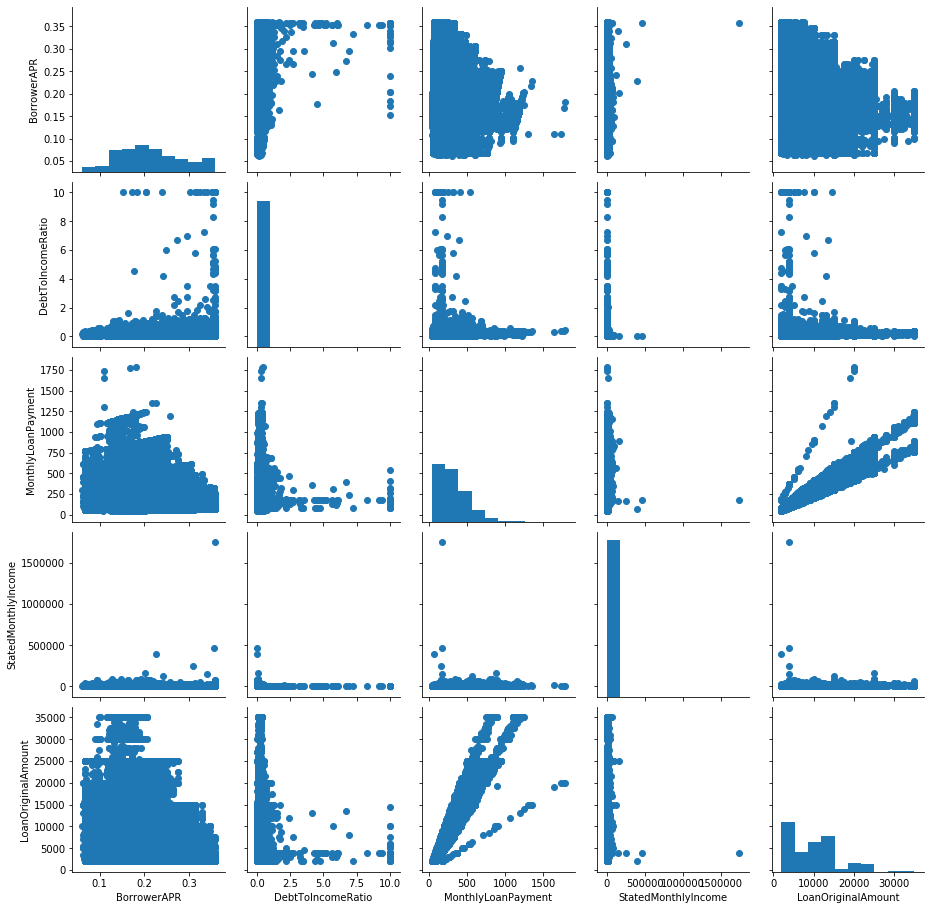

In [25]:
g = sb.PairGrid(data = df, vars = ['BorrowerAPR', 'DebtToIncomeRatio', 'MonthlyLoanPayment','StatedMonthlyIncome', 'LoanOriginalAmount'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

> This gridplot tells us the relationships netween some numerical variables. LoanOriginalAmount and MonthlyLoanPayments seem to a linear relationship

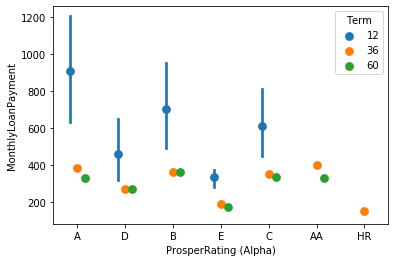

In [26]:
ax = sb.pointplot(data = CurrentLoans, x = 'ProsperRating (Alpha)', y = 'MonthlyLoanPayment', hue = 'Term',
                  dodge = 0.3, linestyles = "")

> MonthlyLoanPayment seems to be high with a 36 term period and for class A and AA followed by B and C

#### Conclusion
> If it is a repeated applicant, then the bank can check for their monthly loan payment and borrower APR and debt to income ratio to grant another loan

> If it is a new applicant, employment status, statedincome and borrowerAPR can help us decide in granting a loan to a potential customer